### Importing necessary libraries

In [1]:
import torch as t
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns  # For correlation heatmap
import pandas as pd
import torchvision.datasets as datasets
import torchvision.transforms as transforms

### Data Loading, Normalisation and Aigmentation

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), transforms.RandomHorizontalFlip(), ])

cifar_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
# train_loader = t.utils.data.DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True)

cifar_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
# test_loader = t.utils.data.DataLoader(mnist_testset, batch_size=batch_size, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
cifar_trainset.data.shape

(50000, 32, 32, 3)

In [5]:
cifar_trainset.targets

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


### Data Augmentation and Feature flattening

In [6]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
)

augmented_images = []
augmented_lables = []
for i,image in enumerate(cifar_trainset.data):
    augmented_images.append(image/255.0)
    # Apply data augmentation
    augmented_images.append(datagen.random_transform(image/255.0))
    augmented_lables.append(cifar_trainset.targets[i])
    augmented_lables.append(cifar_trainset.targets[i])
augmented_images = np.array(augmented_images)

In [7]:
augmented_images.shape

(100000, 32, 32, 3)

In [8]:
# augmented_lables

In [9]:
def flatten_images(dataset):
    return dataset.reshape(len(dataset), -1)

In [10]:
train_features=flatten_images(augmented_images)
# test_features=flatten_images(cifar_testset)

In [11]:
train_features.data.shape

(100000, 3072)

In [12]:
# test_features.data.shape

### Feature Extraction

In [13]:
# Perform PCA for dimensionality reduction
from sklearn.decomposition import PCA
def perform_pca(features, n_components=100):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(features)

In [14]:
# Perform PCA on training and testing features
# train_features_pca = perform_pca(train_features)
# test_features_pca = perform_pca(test_features)

### Stratified Sampling

In [15]:
train_data, test_data, train_labels, test_labels = train_test_split(
    train_features, augmented_lables, test_size=0.2, random_state=42, stratify=augmented_lables
)

In [16]:
train_data.shape

(80000, 3072)

In [17]:
len(train_labels)

80000

In [18]:
train_data_pca=perform_pca(train_data)
test_data_pca=perform_pca(test_data)

### Model evaluation

In [19]:
def evaluate_model(model):
    train_predictions = model.predict(train_data_pca)
    train_accuracy = metrics.accuracy_score(train_labels, train_predictions)
    test_predictions = model.predict(test_data_pca)
    test_accuracy = metrics.accuracy_score(test_labels, test_predictions)
    precision = metrics.precision_score(test_labels, test_predictions, average='weighted')
    recall = metrics.recall_score(test_labels, test_predictions, average='weighted')
    f1_score = metrics.f1_score(test_labels, test_predictions, average='weighted')
    return train_accuracy, test_accuracy, precision, recall, f1_score

### Model Visualisation

In [20]:
def visualize_classification(model, test_data_pca, test_labels, num_examples=5):
    predictions = model.predict(test_data_pca)
    correct_indices = np.where(predictions == test_labels)[0]
    incorrect_indices = np.where(predictions != test_labels)[0]

    # Visualize correct classifications
    print("\nCorrectly Classified Images:")
    for i in range(num_examples):
        plt.subplot(1, num_examples, i + 1)
        plt.imshow(test_data[correct_indices[i]].reshape(32, 32, 3))
        plt.title(f'Actual: {test_labels[correct_indices[i]]}\nPredicted: {predictions[correct_indices[i]]}')
        plt.axis('off')
    plt.show()

    # Visualize incorrect classifications
    print("\nIncorrectly Classified Images:")
    for i in range(num_examples):
        plt.subplot(1, num_examples, i + 1)
        plt.imshow(test_data[incorrect_indices[i]].reshape(32, 32, 3))
        plt.title(f'Actual: {test_labels[incorrect_indices[i]]}\nPredicted: {predictions[incorrect_indices[i]]}')
        plt.axis('off')
    plt.show()

In [21]:
# train_labels[:1000]

### SVM Classifier- RBF

In [22]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

rbf_svm = svm.SVC(kernel='rbf')
param_grid_rbf = {'C': [1, 10, 100], 'gamma': [1e-3, 1e-4]}
grid_search_rbf = GridSearchCV(rbf_svm, param_grid_rbf, cv=3, verbose = 5, n_jobs = -1)
grid_search_rbf.fit(train_data_pca, train_labels)
best_rbf_svm = grid_search_rbf.best_estimator_

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END .................C=1, gamma=0.001;, score=0.455 total time=200.2min
[CV 3/3] END ...............C=10, gamma=0.0001;, score=0.423 total time=111.6min
[CV 3/3] END .................C=1, gamma=0.001;, score=0.456 total time=195.2min
[CV 2/3] END ...............C=10, gamma=0.0001;, score=0.429 total time=116.8min
[CV 2/3] END .................C=1, gamma=0.001;, score=0.465 total time=200.2min
[CV 1/3] END ...............C=100, gamma=0.001;, score=0.565 total time=112.9min
[CV 1/3] END ................C=1, gamma=0.0001;, score=0.381 total time=236.1min
[CV 3/3] END ................C=100, gamma=0.001;, score=0.564 total time=85.0min
[CV 3/3] END ................C=1, gamma=0.0001;, score=0.383 total time=236.0min
[CV 2/3] END ................C=100, gamma=0.001;, score=0.572 total time=85.0min
[CV 2/3] END ................C=1, gamma=0.0001;, score=0.389 total time=236.1min
[CV 1/3] END ...............C=100, gamma=0.0001;,

In [23]:
best_rbf_svm.get_params()

{'C': 100,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.001,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [24]:
train_accuracy, test_accuracy, precision, recall, f1_score = evaluate_model(best_rbf_svm)

In [26]:
print('Train accuracy:',train_accuracy)
print('Test accuracy:',test_accuracy)
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1_score)

Train accuracy: 0.7555375
Test accuracy: 0.2002
Precision: 0.19960996273701967
Recall: 0.2002
F1 score: 0.19910753738458453



Correctly Classified Images:


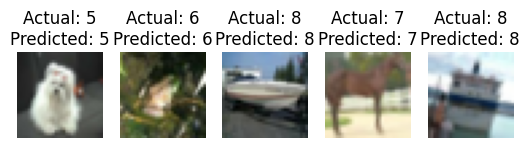


Incorrectly Classified Images:


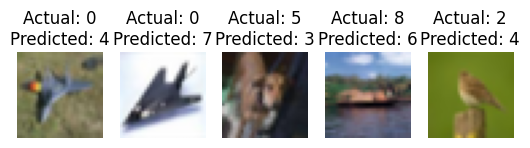

In [25]:
visualize_classification(best_rbf_svm, test_data_pca, test_labels)

### Model Saving

In [27]:
import pickle

# save
with open('q2_rbf.pkl','wb') as f:
    pickle.dump(best_rbf_svm,f)

# load
with open('q2_rbf.pkl', 'rb') as f:
    best_rbf_svm = pickle.load(f)

### SVM Classifier- Linear

In [34]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

rbf_svm = svm.SVC(kernel='linear')
param_grid_rbf = {'C': [1, 10, 100]}
grid_search_rbf = GridSearchCV(rbf_svm, param_grid_rbf, cv=2, verbose = 5, n_jobs = -1)
grid_search_rbf.fit(train_data_pca, train_labels)
best_lin_svm = grid_search_rbf.best_estimator_

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV 1/2] END .............................C=100;, score=0.254 total time=   0.1s
[CV 2/2] END ..............................C=10;, score=0.258 total time=   0.1s
[CV 2/2] END ...............................C=1;, score=0.344 total time=  25.6s
[CV 1/2] END ...............................C=1;, score=0.351 total time=  25.4s
[CV 1/2] END ...............................C=1;, score=0.254 total time=   0.1s
[CV 1/2] END ..............................C=10;, score=0.354 total time= 4.0min
[CV 1/2] END ..............................C=10;, score=0.254 total time=   0.1s
[CV 2/2] END ..............................C=10;, score=0.344 total time= 4.2min
[CV 2/2] END .............................C=100;, score=0.258 total time=   0.1s
[CV 1/2] END .............................C=100;, score=0.355 total time=31.2min
[CV 2/2] END ...............................C=1;, score=0.254 total time=   0.1s
[CV 2/2] END .............................C=100;, 

In [35]:
best_lin_svm.get_params()

{'C': 100,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [36]:
train_accuracy, test_accuracy, precision, recall, f1_score = evaluate_model(best_lin_svm)

In [37]:
print('Train accuracy:',train_accuracy)
print('Test accuracy:',test_accuracy)
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1_score)

Train accuracy: 0.386625
Test accuracy: 0.178
Precision: 0.17804723291236985
Recall: 0.178
F1 score: 0.1774955941846392



Correctly Classified Images:


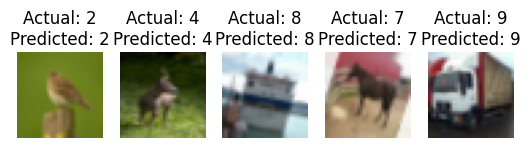


Incorrectly Classified Images:


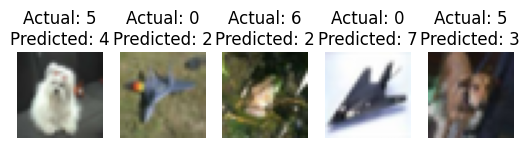

In [38]:
visualize_classification(best_lin_svm, test_data_pca, test_labels)

In [39]:
import pickle

# save
with open('q2_lin_2.pkl','wb') as f:
    pickle.dump(best_lin_svm,f)

# load
with open('q2_lin_2.pkl', 'rb') as f:
    best_lin_svm = pickle.load(f)